<a href="https://colab.research.google.com/github/minghoona/minghoona.github.io/blob/master/Linear_Regression_Boston_House_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy를 이용한 방정식 풀이

In [0]:
import numpy as np

ans = (np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2)
ans

In [0]:
ans[0], ans[1], ans[2]

In [0]:
import sympy as sp
from sympy.plotting import plot

th = sp.symbols('th')
p1 = plot(38*(th**2) - 94*th + 62, (th, -3, 6))

In [0]:
diff_th = sp.diff(38*(th**2) - 94*th + 62, th)
diff_th

In [0]:
sp.solve(diff_th)

# Boston House Price Linear Regression Model

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
import pandas as pd

boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_pd['PRICE'] = boston.target #label

boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


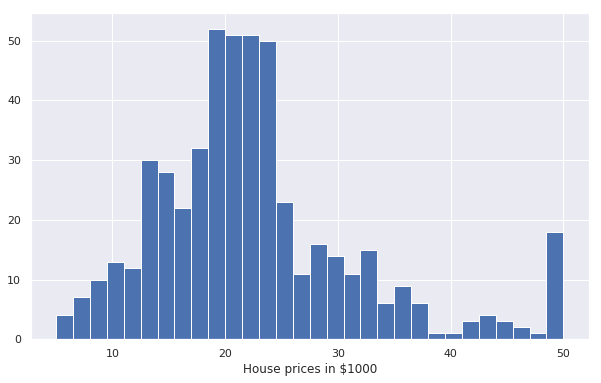

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 6)})
plt.hist(boston_pd['PRICE'], bins=30) # 30등분
plt.xlabel("House prices in $1000")
plt.show()

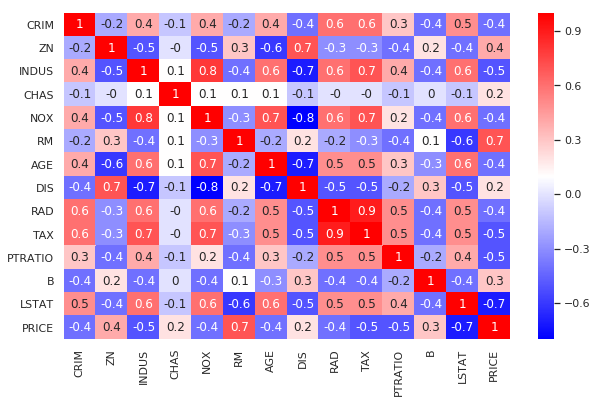

In [5]:
correlation_matrix = boston_pd.corr().round(1) #소숫점 1자리 까지 반올림
sns.heatmap(data=correlation_matrix, annot=True, cmap="bwr")

상관 행렬을 보면 LSTAT가 PRICE (-0.74)와 높은 음의 상관 관계를 갖는 것처럼 RM은 PRICE (0.7)와 강한 양의 상관 관계가 있음을 알 수 있습니다.
선형 회귀 모형의 피처를 선택할 때 중요한 점은 다중 공선 성을 확인하는 것입니다. RAD, TAX 기능은 0.91의 상관 관계를 갖습니다. 이러한 기능 쌍은 서로 밀접하게 관련되어 있습니다. 모델에 영향을 줄 수 있습니다. 상관 관계가 -0.75 인 기능 DIS 및 AGE도 마찬가지입니다.

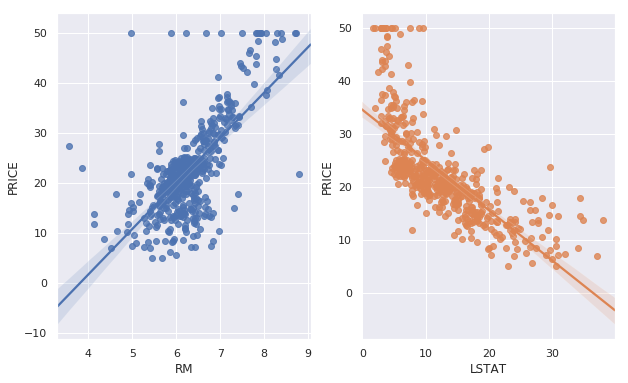

In [6]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=boston_pd, ax=axs[0]) #1번째 칸에 rm, price 
sns.regplot(x='LSTAT', y='PRICE', data=boston_pd, ax=axs[1]) #두번째 칸에 LSTAT, PRICE
#regplot->seaborn????

In [7]:
import numpy as np

X_rooms = boston_pd['RM']
y_price = boston_pd['PRICE']

X_rooms = np.array(X_rooms).reshape(-1,1) #-1은 신경쓰지 않겠다.
#reshape -> 행렬곱이 만들어져야 함 : 행렬곱 때문에 붙여주는 옵션


print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506,)


In [8]:
from sklearn.model_selection import train_test_split
#정답체점용으로 test데이터에 라벨링 함
X_train, X_test, y_train, y_test = \
                    train_test_split(X_rooms, y_price, 
                                     test_size = 0.2, random_state=13)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


In [9]:
from sklearn.linear_model import LinearRegression
#mean Square Error 때문에 사용하는 것임


reg = LinearRegression() #훈련을 완료한 모델, 내가 만든 모델은 reg에 저장되어 있음
reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error 

y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict))) #RMS

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is ', rmse)

The model performance for training set
--------------------------------------
RMSE is  6.558400914980574


In [10]:
y_test_predict = reg.predict(X_test)#학습되지 않은 데이터
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is ', rmse)

#연습 데이터로 나온 수치와 테스트 데이터로 나온 수치가 비슷하면 과적합이 일어나지 않았다는 것을 의미??

The model performance for test set
--------------------------------------
RMSE is  6.7881975443771765


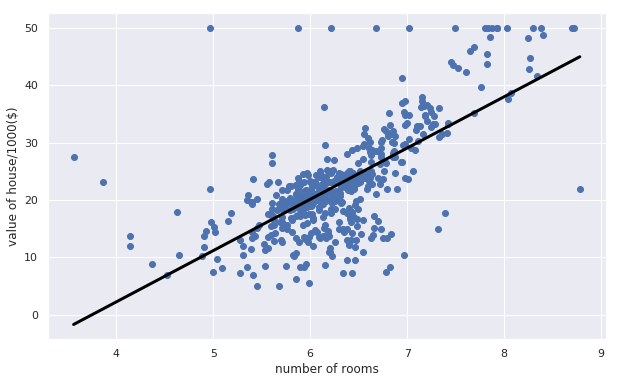

In [11]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) #1~100 y = ax+b를 찾겠다.
plt.scatter(X_rooms, y_price)
plt.plot(prediction_space, reg.predict(prediction_space), 
         color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)') #y축 라벨 지정
plt.xlabel('number of rooms') #x축 라벨 지정
plt.show()

In [12]:
X = boston_pd.drop('PRICE', axis = 1) #target값 라벨
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size=0.2, random_state=13)

reg_all = LinearRegression() 
reg_all.fit(X_train, y_train)

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is ', rmse)

The model performance for training set
--------------------------------------
RMSE is  4.642806069019824


In [13]:
y_pred = reg_all.predict(X_test) #훈련에 쓰지 않은 데이터 삽입
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is ', rmse)

The model performance for training set
--------------------------------------
RMSE is  4.9313525841467


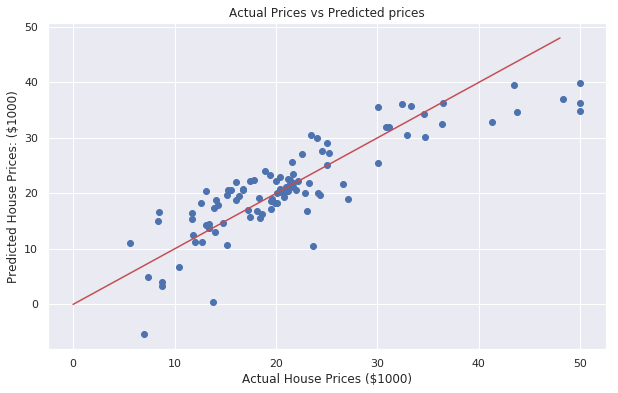

In [14]:
plt.scatter(y_test, y_pred) #완벽하게 맞췄다면 y = x 의 직선으로 그래프가 나옴
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.title("Actual Prices vs Predicted prices")
plt.plot([0,48], [0, 48], 'r') #0,0부터 48,48까지 이어라
